# Imports

In [3]:
import pandas as pd
import os, sys

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../..')))

from utils.time_utils import TimeProcessorMM

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data

In [4]:
base_dir = "/Users/andrew/Desktop/Harvard/idreos-research/gpu_profiling"
time_processor_mm = TimeProcessorMM(base_dir)
df = time_processor_mm.get_data(sample_rate=0.1)

In [5]:
df

,kernel_params,dtype,n,m,p,time,gflops
0,32.16.432.64,32,16,432,64,0.020480,0.000885
1,b16.16.31744.400,b16,16,31744,400,0.026624,0.406323
2,32.16.80.30720,32,16,80,30720,0.022528,0.078643
3,16.16.32768.464,16,16,32768,464,0.032768,0.486539
4,b16.16.432.10240,b16,16,432,10240,0.019456,0.141558
...,...,...,...,...,...,...,...
124771,32.31744.25600.512,32,31744,25600,512,43.825665,832.149914
124772,32.31744.896.3072,32,31744,896,3072,9.204736,174.751482
124773,b16.31744.768.1664,b16,31744,768,1664,0.337408,81.134617
124774,b16.31744.3072.25600,b16,31744,3072,25600,18.167809,4992.899482


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124776 entries, 0 to 124775
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   kernel_params  124776 non-null  object  
 1   dtype          124776 non-null  category
 2   n              124776 non-null  int64   
 3   m              124776 non-null  int64   
 4   p              124776 non-null  int64   
 5   time           124776 non-null  float64 
 6   gflops         124776 non-null  float64 
dtypes: category(1), float64(2), int64(3), object(1)
memory usage: 5.8+ MB


# Gflops

<AxesSubplot:>

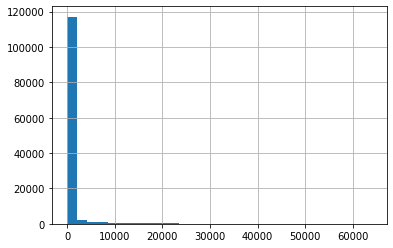

In [7]:
df['gflops'].hist(bins=30)

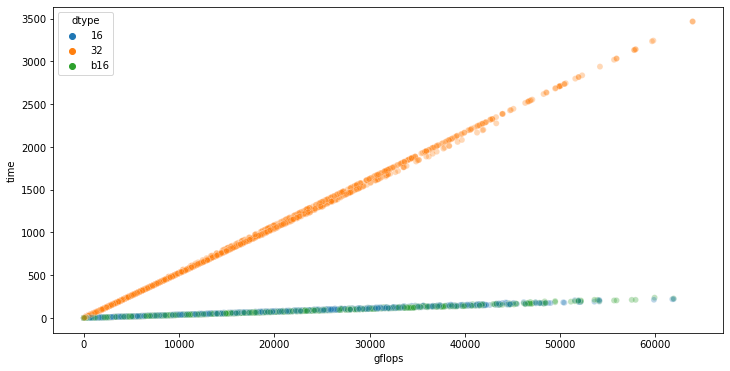

In [8]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="gflops", y="time", hue="dtype", alpha=0.3, data=df)
plt.show()

# mnp

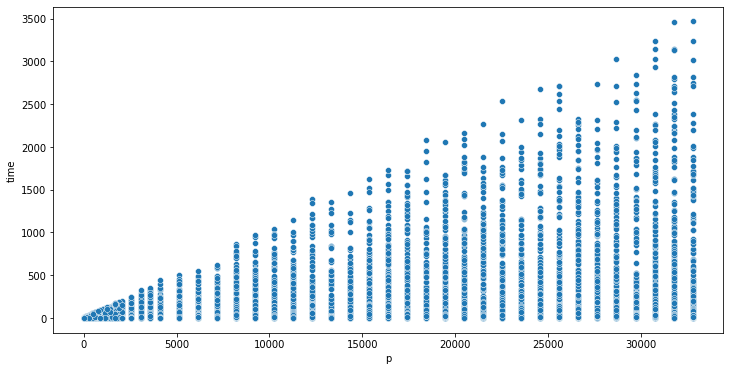

In [9]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="p", y="time", data=df.query("dtype == '32'"))
plt.show()

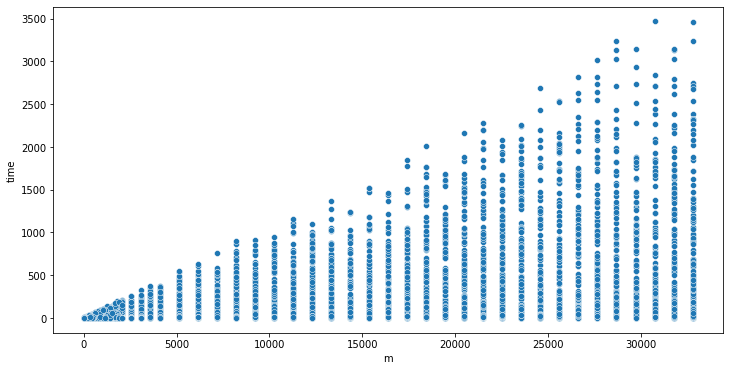

In [10]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="m", y="time", data=df.query("dtype == '32'"))
plt.show()

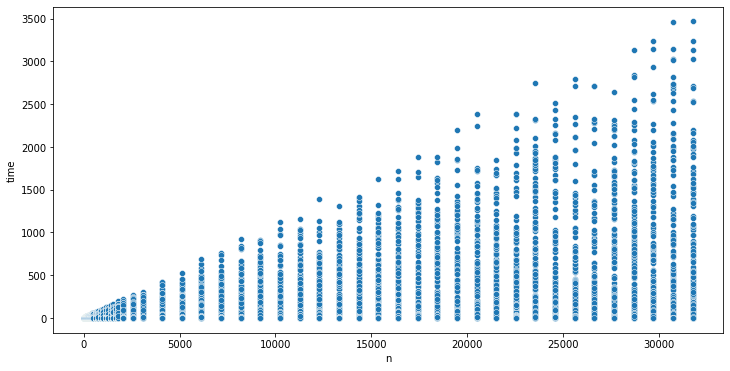

In [11]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="n", y="time", data=df.query("dtype == '32'"))
plt.show()

# gflops highly correlated with time: 0.999

In [12]:
df.groupby("dtype")[["gflops", "time"]].corr()

/var/folders/c8/q9xddvxj5pv262qffnm05sk00000gn/T/ipykernel_93847/310776800.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("dtype")[["gflops", "time"]].corr()


gflops      time
dtype                           
16    gflops  1.000000  0.999096
      time    0.999096  1.000000
32    gflops  1.000000  0.999848
      time    0.999848  1.000000
b16   gflops  1.000000  0.999231
      time    0.999231  1.000000

# Smaller flops: not quite linear.

There are clearly a subset of values

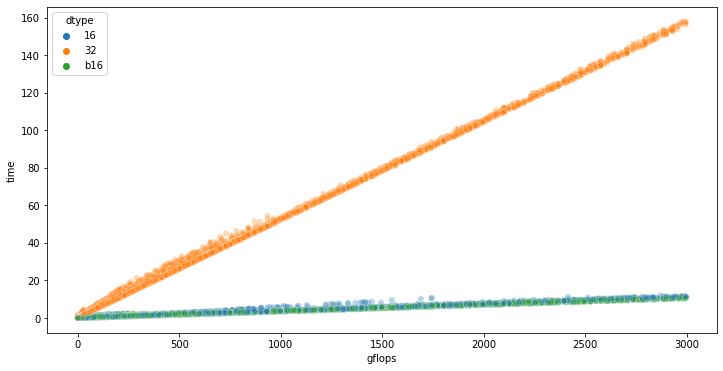

In [13]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="gflops", y="time", hue="dtype", alpha=0.3, data=df.query("gflops < 3000"))
plt.show()

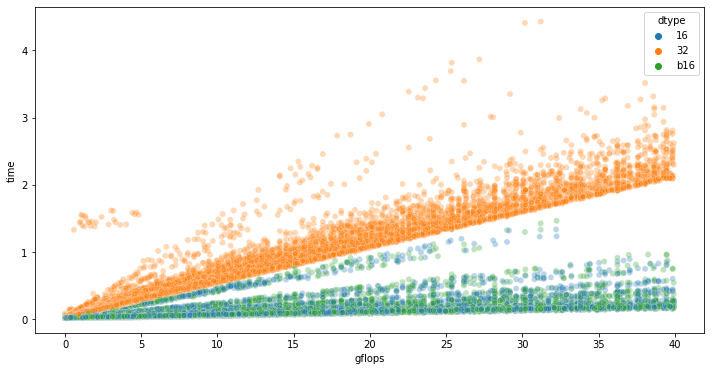

In [14]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="gflops", y="time", hue="dtype", alpha=0.3, data=df.query("gflops < 40"))
plt.show()

In [15]:
df.query("gflops < 40").groupby("dtype")[["gflops", "time"]].corr()

/var/folders/c8/q9xddvxj5pv262qffnm05sk00000gn/T/ipykernel_93847/3659509330.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.query("gflops < 40").groupby("dtype")[["gflops", "time"]].corr()


gflops      time
dtype                           
16    gflops  1.000000  0.709295
      time    0.709295  1.000000
32    gflops  1.000000  0.978099
      time    0.978099  1.000000
b16   gflops  1.000000  0.705993
      time    0.705993  1.000000

# What's up with the "outlier group"?

In [29]:
small_df = df.query('gflops < 10 & time > 1')
small_df

,kernel_params,dtype,n,m,p,time,gflops
414,32.16.11264.25600,32,16,11264,25600,1.069568,9.227469
549,32.16.13312.14336,32,16,13312,14336,1.014784,6.106907
1093,32.16.20480.14336,32,16,20480,14336,1.094144,9.395241
1168,32.16.21504.13312,32,16,21504,13312,1.021952,9.160360
1466,32.16.31744.9216,32,16,31744,9216,1.015808,9.361687
1626,32.16.17408.17408,32,16,17408,17408,1.163264,9.697231
1663,32.16.16384.17408,32,16,16384,17408,1.088512,9.126806
56163,32.768.20480.48,32,768,20480,48,1.441280,1.509949
56879,32.768.21504.48,32,768,21504,48,1.441792,1.585447
57342,32.896.12288.48,32,896,12288,48,1.551360,1.056965


In [17]:
small_df.describe()

,n,m,p,time,gflops
count,46.000000,46.000000,46.000000,46.000000,46.000000
mean,5804.173913,21081.043478,2452.173913,1.345247,4.956847
std,8759.267791,7132.400210,6070.074176,0.186609,3.318678
min,16.000000,9216.000000,16.000000,1.014784,0.587203
25%,928.000000,15360.000000,16.000000,1.179520,1.696596
50%,1408.000000,21504.000000,32.000000,1.398016,4.215276
75%,8864.000000,27136.000000,48.000000,1.472128,8.724152
max,30720.000000,32768.000000,25600.000000,1.617408,9.697231


Interesting: lots of small m and p values, but m everywhere

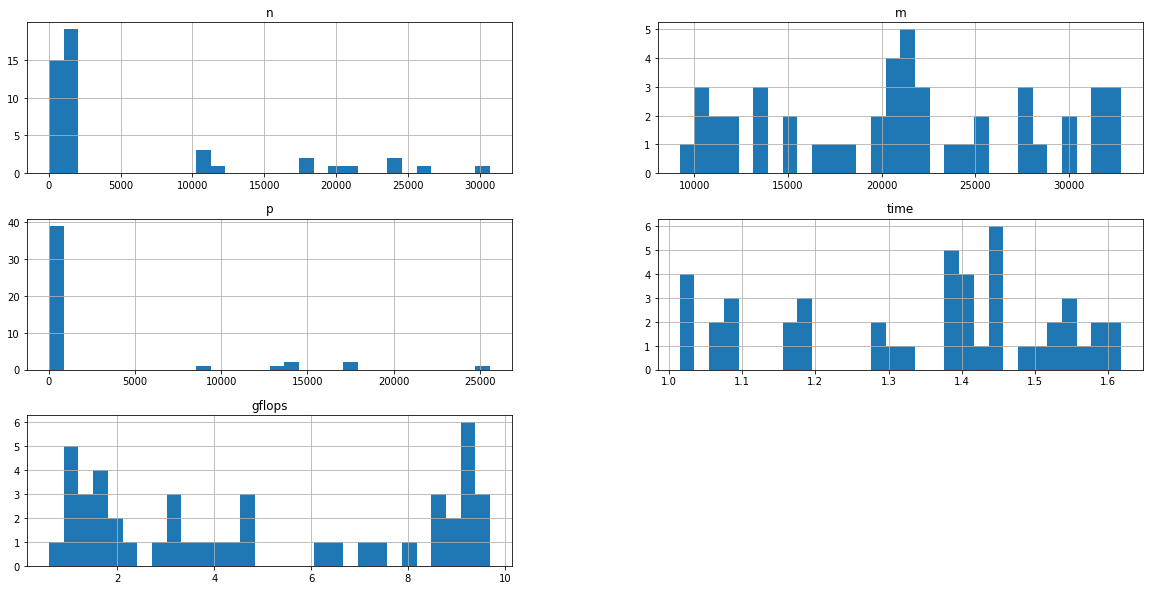

In [18]:
small_df.hist(bins=30, figsize=(20, 10))
plt.show()

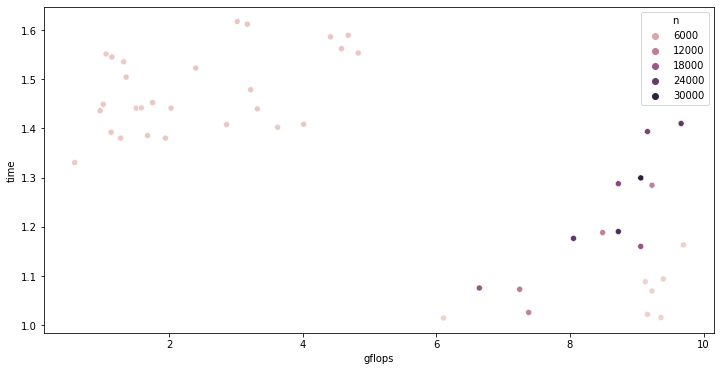

In [19]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="gflops", y="time", hue="n", data=small_df)
plt.show()

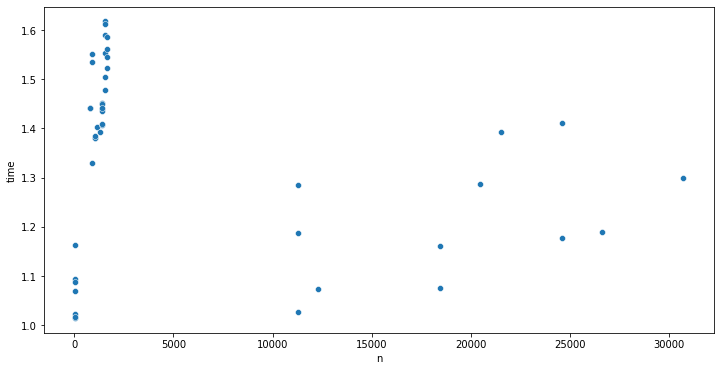

In [20]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="n", y="time", data=df.query('gflops < 10 & time > 1'))
plt.show()

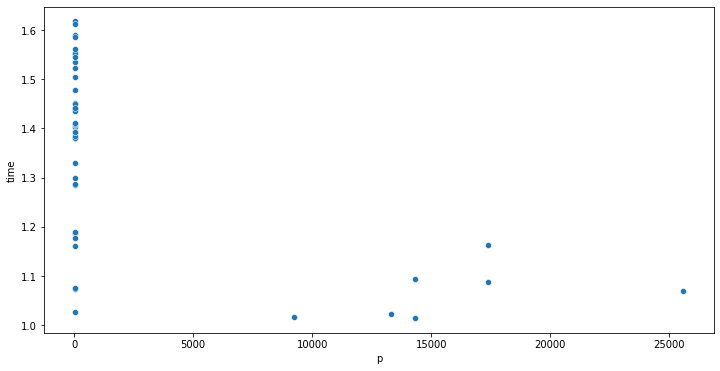

In [21]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="p", y="time", data=df.query('gflops < 10 & time > 1'))
plt.show()

Seems like—mainly a function of m

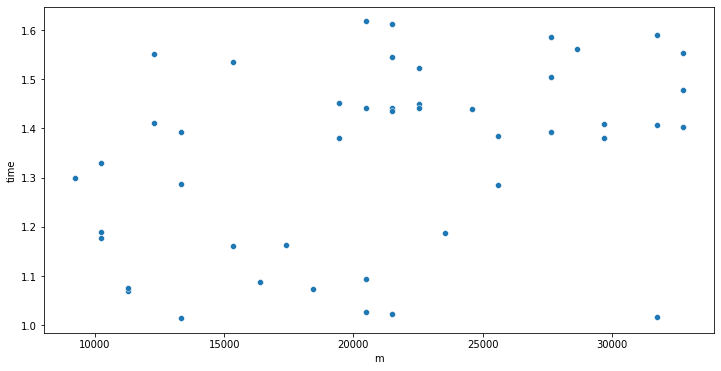

In [22]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="m", y="time", data=df.query('gflops < 10 & time > 1'))
plt.show()

# Switch values?

In [23]:
small_df['p'].describe()

count       46.000000
mean      2452.173913
std       6070.074176
min         16.000000
25%         16.000000
50%         32.000000
75%         48.000000
max      25600.000000
Name: p, dtype: float64

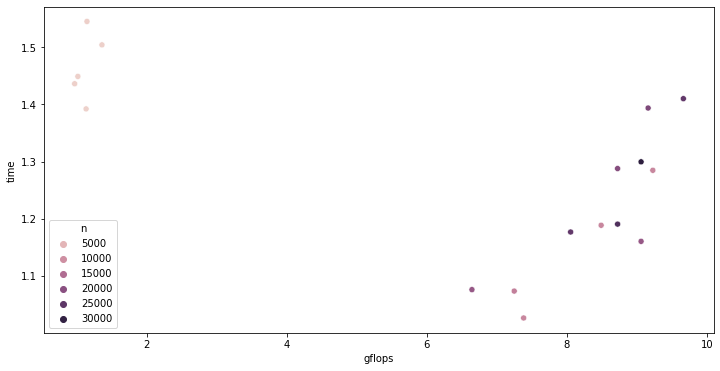

In [24]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="gflops", y="time", hue="n", data=small_df.query("p == 16.0"))
plt.show()

Interesting: one dimension is super large

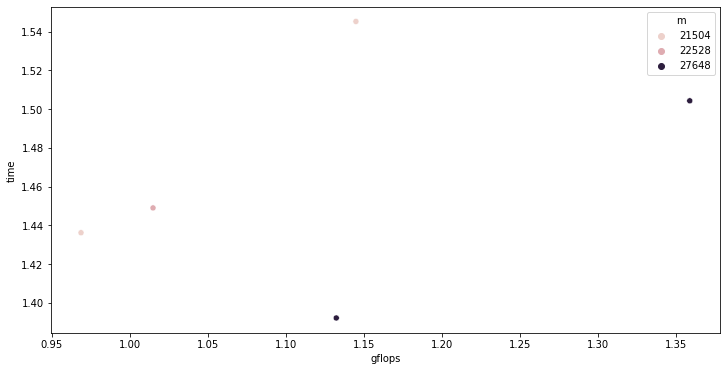

In [25]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="gflops", y="time", hue="m", data=small_df.query("p == 16.0 & n < 6000"))
plt.show()

# Weird: what about small n and p?

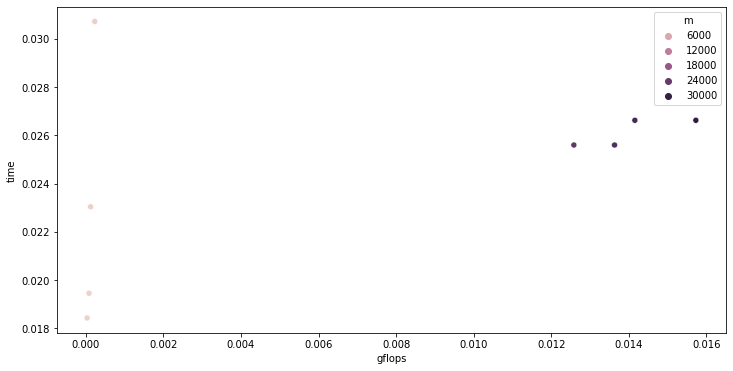

In [26]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="gflops", y="time", hue="m", data=df.query("dtype == '32' & p == 16.0 & n == 16.0"))
plt.show()

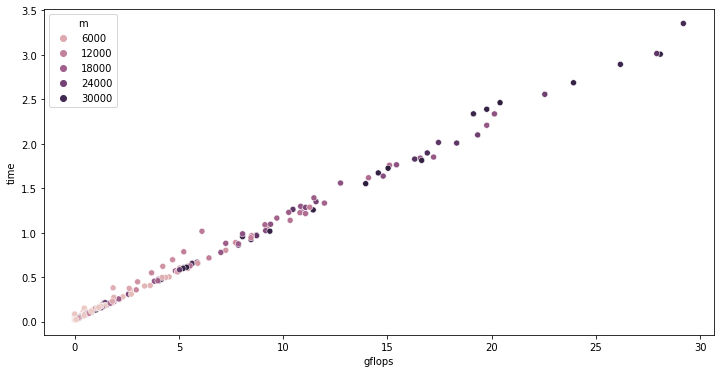

In [30]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="gflops", y="time", hue="m", data=df.query("dtype == '32' & n == 16.0"))
plt.show()

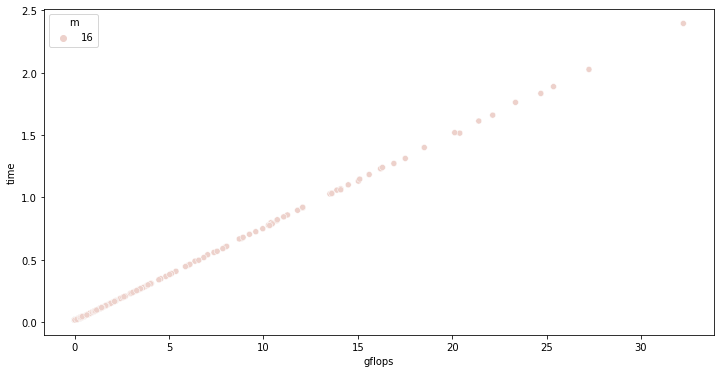

In [31]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="gflops", y="time", hue="m", data=df.query("dtype == '32' & m == 16.0"))
plt.show()

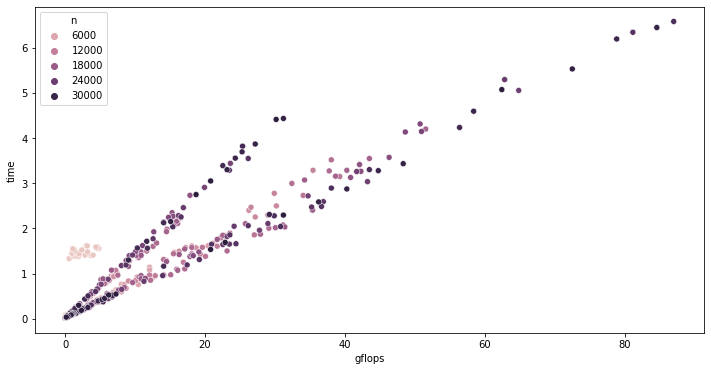

In [36]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="gflops", y="time", hue="n", data=df.query("dtype == '32' & p < 64"))
plt.show()

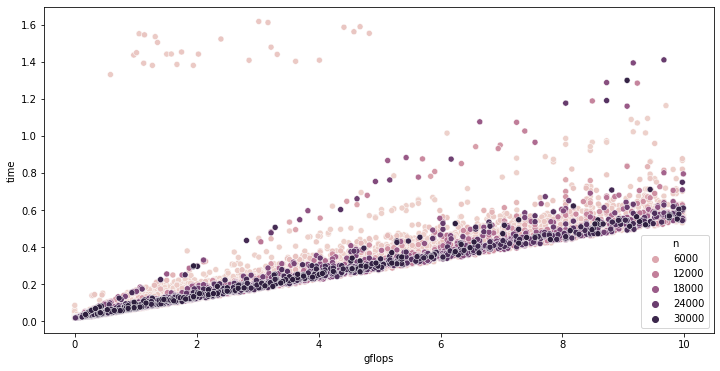

In [37]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="gflops", y="time", hue="n", data=df.query("dtype == '32' & gflops < 10"))
plt.show()

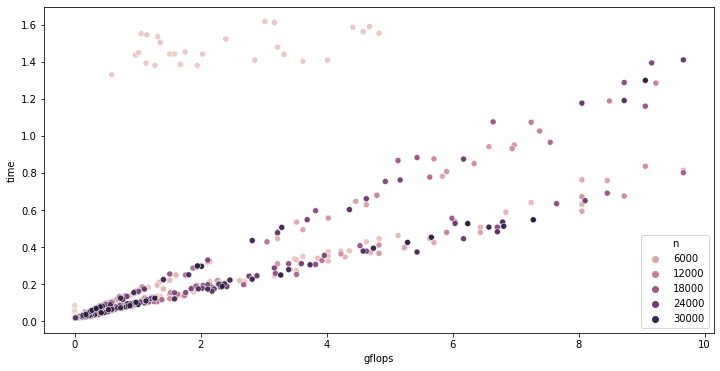

In [40]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="gflops", y="time", hue="n", data=df.query("dtype == '32' & gflops < 10 & p < 64"))
plt.show()

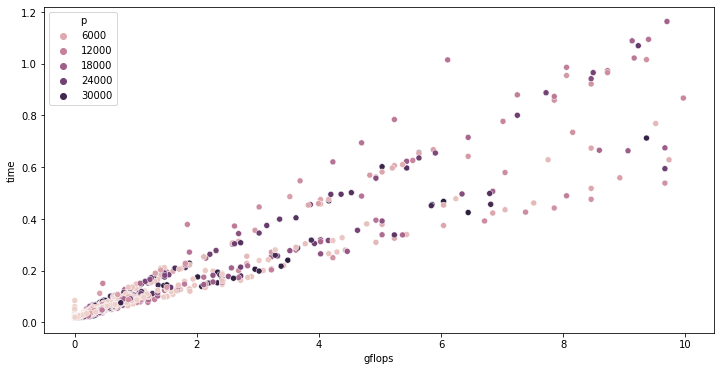

In [41]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="gflops", y="time", hue="p", data=df.query("dtype == '32' & gflops < 10 & n < 64"))
plt.show()